# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [1]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Using TensorFlow backend.


Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun: "the_nightmare"

Simulation Confiugration Information:
 
We're plotting the function: jumpdiscontinuity with 0.1 additive noise, a distortion/model uncertainty level of0.1, and an out-of sample window on either side of the input space of:0.01.  We train using 10000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


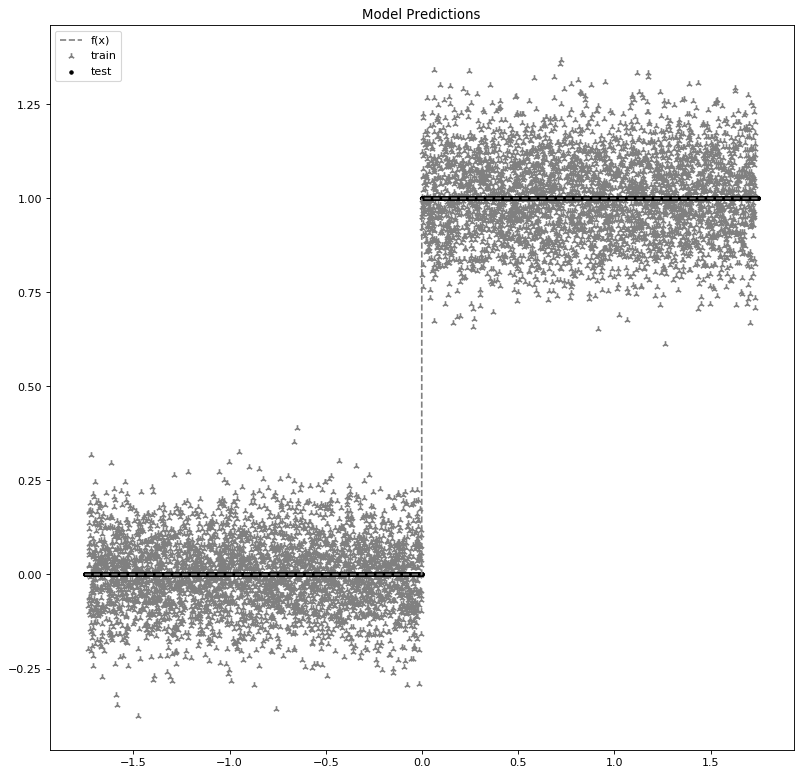

In [2]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "jumpdiscontinuity"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

# Benchmark Models

Run univariate regression benchmarks file:

In [3]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.9s finished


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0995s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   17.2s remaining:   17.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   25.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   25.9s finished


Epoch 1/50
235/235 [==============================] - 0s 938us/step - loss: 0.4861 - mse: 0.3942 - mae: 0.4861 - mape: 791.3991
Epoch 2/50
235/235 [==============================] - 0s 991us/step - loss: 0.2270 - mse: 0.0798 - mae: 0.2270 - mape: 619.1657
Epoch 3/50
235/235 [==============================] - 0s 988us/step - loss: 0.2167 - mse: 0.0738 - mae: 0.2167 - mape: 516.3205
Epoch 4/50
235/235 [==============================] - 0s 977us/step - loss: 0.2114 - mse: 0.0695 - mae: 0.2114 - mape: 638.2309
Epoch 5/50
235/235 [==============================] - 0s 984us/step - loss: 0.2040 - mse: 0.0650 - mae: 0.2040 - mape: 753.7354
Epoch 6/50
235/235 [==============================] - 0s 959us/step - loss: 0.1916 - mse: 0.0592 - mae: 0.1916 - mape: 782.5317
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1701 - mse: 0.0497 - mae: 0.1701 - mape: 671.3611
Epoch 8/50
235/235 [==============================] - 0s 939us/step - loss: 0.1506 - mse: 0.0411 - mae: 0.

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [4]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [5]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x**2],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test**2],axis=1)
    d = d+1
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print("Modified Input since Dimension is too low")

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [6]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   40.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   41.1s remaining:   41.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 134.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 134.2min finished


Epoch 1/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.2969 - mse: 0.1452 - mae: 0.2898 - mape: 901.5882
Epoch 2/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.2089 - mse: 0.0616 - mae: 0.1940 - mape: 863.6646
Epoch 3/1000
469/469 [==============================] - 13s 27ms/step - loss: 0.1982 - mse: 0.0552 - mae: 0.1816 - mape: 720.1686
Epoch 4/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.1944 - mse: 0.0531 - mae: 0.1776 - mape: 731.8643
Epoch 5/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.1930 - mse: 0.0524 - mae: 0.1762 - mape: 829.0641
Epoch 6/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1885 - mse: 0.0504 - mae: 0.1718 - mape: 755.4471
Epoch 7/1000
469/469 [==============================] - 13s 27ms/step - loss: 0.1878 - mse: 0.0502 - mae: 0.1711 - mape: 736.6721
Epoch 8/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1854 - mse

469/469 [==============================] - 12s 26ms/step - loss: 0.1611 - mse: 0.0409 - mae: 0.1515 - mape: 570.8351
Epoch 64/1000
469/469 [==============================] - 13s 27ms/step - loss: 0.1613 - mse: 0.0412 - mae: 0.1517 - mape: 581.9252
Epoch 65/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1624 - mse: 0.0413 - mae: 0.1529 - mape: 569.5978
Epoch 66/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1615 - mse: 0.0413 - mae: 0.1520 - mape: 598.5391
Epoch 67/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1594 - mse: 0.0401 - mae: 0.1499 - mape: 564.8276
Epoch 68/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1620 - mse: 0.0417 - mae: 0.1525 - mape: 543.3009
Epoch 69/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1603 - mse: 0.0409 - mae: 0.1508 - mape: 648.1967
Epoch 70/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1601 - mse: 0.04

469/469 [==============================] - 12s 26ms/step - loss: 0.1600 - mse: 0.0408 - mae: 0.1510 - mape: 485.1579
Epoch 126/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1592 - mse: 0.0406 - mae: 0.1502 - mape: 565.8492
Epoch 127/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1597 - mse: 0.0407 - mae: 0.1507 - mape: 598.5493
Epoch 128/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1587 - mse: 0.0402 - mae: 0.1497 - mape: 663.0276
Epoch 129/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1601 - mse: 0.0412 - mae: 0.1512 - mape: 527.3881
Epoch 130/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.1584 - mse: 0.0401 - mae: 0.1495 - mape: 554.8449
Epoch 131/1000
469/469 [==============================] - 12s 27ms/step - loss: 0.1589 - mse: 0.0403 - mae: 0.1500 - mape: 587.2094
Epoch 132/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1585 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1611 - mse: 0.0415 - mae: 0.1523 - mape: 523.3389
Epoch 188/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1587 - mse: 0.0403 - mae: 0.1499 - mape: 566.4437
Epoch 189/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1581 - mse: 0.0400 - mae: 0.1492 - mape: 513.8937
Epoch 190/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1567 - mse: 0.0396 - mae: 0.1479 - mape: 511.4265
Epoch 191/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1587 - mse: 0.0403 - mae: 0.1499 - mape: 520.0886
Epoch 192/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1594 - mse: 0.0405 - mae: 0.1507 - mape: 550.8057
Epoch 193/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1582 - mse: 0.0404 - mae: 0.1494 - mape: 485.2640
Epoch 194/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1563 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1588 - mse: 0.0405 - mae: 0.1500 - mape: 641.8913
Epoch 250/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1596 - mse: 0.0407 - mae: 0.1509 - mape: 565.5723
Epoch 251/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1589 - mse: 0.0404 - mae: 0.1502 - mape: 592.2426
Epoch 252/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1603 - mse: 0.0409 - mae: 0.1516 - mape: 575.8005
Epoch 253/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1596 - mse: 0.0407 - mae: 0.1508 - mape: 597.9327
Epoch 254/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1587 - mse: 0.0406 - mae: 0.1500 - mape: 646.3056
Epoch 255/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1596 - mse: 0.0407 - mae: 0.1507 - mape: 519.6036
Epoch 256/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1574 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1599 - mse: 0.0409 - mae: 0.1511 - mape: 522.3873
Epoch 312/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1601 - mse: 0.0411 - mae: 0.1513 - mape: 576.6357
Epoch 313/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1570 - mse: 0.0396 - mae: 0.1481 - mape: 580.9418
Epoch 314/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1574 - mse: 0.0396 - mae: 0.1486 - mape: 568.8339
Epoch 315/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1569 - mse: 0.0397 - mae: 0.1481 - mape: 623.7296
Epoch 316/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1580 - mse: 0.0399 - mae: 0.1493 - mape: 539.1274
Epoch 317/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1595 - mse: 0.0404 - mae: 0.1508 - mape: 534.1298
Epoch 318/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1583 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1572 - mse: 0.0397 - mae: 0.1486 - mape: 536.9575
Epoch 374/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1576 - mse: 0.0400 - mae: 0.1490 - mape: 480.7613
Epoch 375/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1585 - mse: 0.0402 - mae: 0.1499 - mape: 537.1978
Epoch 376/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1597 - mse: 0.0409 - mae: 0.1510 - mape: 584.9059
Epoch 377/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1565 - mse: 0.0392 - mae: 0.1478 - mape: 608.3538
Epoch 378/1000
469/469 [==============================] - 13s 27ms/step - loss: 0.1558 - mse: 0.0387 - mae: 0.1472 - mape: 600.3549
Epoch 379/1000
469/469 [==============================] - 13s 28ms/step - loss: 0.1606 - mse: 0.0414 - mae: 0.1520 - mape: 541.6496
Epoch 380/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1581 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1587 - mse: 0.0402 - mae: 0.1500 - mape: 611.9011
Epoch 436/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1579 - mse: 0.0397 - mae: 0.1492 - mape: 511.3108
Epoch 437/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1583 - mse: 0.0401 - mae: 0.1496 - mape: 523.6366
Epoch 438/1000
469/469 [==============================] - 13s 28ms/step - loss: 0.1567 - mse: 0.0397 - mae: 0.1480 - mape: 565.5845
Epoch 439/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1574 - mse: 0.0398 - mae: 0.1487 - mape: 592.0135
Epoch 440/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1564 - mse: 0.0394 - mae: 0.1476 - mape: 570.3058
Epoch 441/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1572 - mse: 0.0396 - mae: 0.1485 - mape: 667.8624
Epoch 442/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1574 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1558 - mse: 0.0390 - mae: 0.1471 - mape: 475.7363
Epoch 498/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1568 - mse: 0.0397 - mae: 0.1482 - mape: 554.1547
Epoch 499/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1563 - mse: 0.0392 - mae: 0.1477 - mape: 677.8026
Epoch 500/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1567 - mse: 0.0393 - mae: 0.1481 - mape: 626.8368
Epoch 501/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1559 - mse: 0.0390 - mae: 0.1474 - mape: 640.2726
Epoch 502/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1575 - mse: 0.0399 - mae: 0.1489 - mape: 579.8324
Epoch 503/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1584 - mse: 0.0404 - mae: 0.1499 - mape: 748.6171
Epoch 504/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1575 - ms

469/469 [==============================] - 12s 26ms/step - loss: 0.1561 - mse: 0.0393 - mae: 0.1476 - mape: 585.5529
Epoch 560/1000
469/469 [==============================] - 14s 29ms/step - loss: 0.1550 - mse: 0.0386 - mae: 0.1466 - mape: 692.7661
Epoch 561/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1575 - mse: 0.0398 - mae: 0.1490 - mape: 571.5024
Epoch 562/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1575 - mse: 0.0398 - mae: 0.1490 - mape: 634.1779
Epoch 563/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1572 - mse: 0.0398 - mae: 0.1487 - mape: 648.3885
Epoch 564/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1574 - mse: 0.0398 - mae: 0.1489 - mape: 509.1568
Epoch 565/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1570 - mse: 0.0396 - mae: 0.1484 - mape: 653.6689
Epoch 566/1000
469/469 [==============================] - 12s 26ms/step - loss: 0.1579 - ms

KeyboardInterrupt: 

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
# NEU_lin_reg = LinearRegression()
# NEU_lin_reg.fit(data_x_featured_train,data_y)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
NEU_lin_reg = ElasticNetCV(cv=5, random_state=0, alphas = np.linspace(0,(10**2),(10**2)),
                           l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

In [ ]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

#### Visual Comaprison between the OLS and the NEU-OLS models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test,"OLS")

#### Comparison between Elastic-Net and NEU-ENET

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

---
# Non-Linear Models
---

### NEU-Smoothing Splines

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test = get_smooting_splines(data_x = (data_x_NEU_train_feature_only.mean(axis=1)),
                                                                                       data_x_test = (data_x_NEU_test_feature_only.mean(axis=1)),
                                                                                       data_y = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_Ssplines = np.concatenate([data_x_featured_train,
                                   NEU_Ssplines_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_Ssplines = np.concatenate([data_x_featured_test,
                                  NEU_Ssplines_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_Ssplines_y_hat_train, NEU_Ssplines_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_Ssplines, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_Ssplines)

#### Visual Comaprison between the Smoothing Splines and the NEU-Smoothing Splines models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test, color = 'grey',linestyle=":", label='Smoothing Splines. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_Ssplines_y_hat_test, color = 'sienna',label='NEU-Smoothing Splines')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,f_hat_smoothing_splines_test,NEU_Ssplines_y_hat_test,"Splines")

#### Numerical Comparison between the Smoothing Splines regressor and NEU-Smoothing Splines regressor models:

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Smoothing Splines Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Smoothing Splines Performance:")
print(reporter(NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test,data_y,data_y_test))

### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train,NEU_KReg_y_hat_test, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_featured_train,
                                   NEU_KReg_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_featured_test,
                                  NEU_KReg_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_KReg, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_KReg)

#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_GBRF, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_GBRF)

#### Visual Comaprison between the GBRF and the NEU-GBRF models:

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [ ]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [ ]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [ ]:
# tf.random.set_seed(2020)
# NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
#                                                            n_jobs = n_jobs, 
#                                                            n_iter = n_iter, 
#                                                            param_grid_in = param_grid_NEU_Nets, 
#                                                            X_train = data_x, 
#                                                            y_train = data_y,
#                                                            X_test = data_x_test)

#### Decoupled Implementation

In [ ]:
# tf.random.set_seed(2020)
# # 1+2) Learn Linearizing Feature Map #
# #====================================#
# # Completed Above
# print("Phase 1 Complete: Feature Map Trained/Loaded")

# # 2) Train ffNN #
# #===============#
# NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
#                                                                    n_jobs = n_jobs, 
#                                                                    n_iter = n_iter, 
#                                                                    param_grid_in = param_grid_Vanilla_Nets,  
#                                                                    X_train = data_x_NEU_train_feature_only, 
#                                                                    y_train = data_y,
#                                                                    X_test = data_x_NEU_test_feature_only)
# # Pre-process Linearized Data #
# #=============================#
# # Get Linearized Predictions #
# #----------------------------#
# # Coerce data into form ready for NEU-Structure Map
# data_x_NEU_train = np.concatenate([data_x_featured_train,
#                                    NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
# data_x_NEU_test = np.concatenate([data_x_featured_test,
#                                   NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# # Update User #
# #-------------#
# print("Phase 2 Complete: Trained Vanilla Model")

# # 3) Learn Structure Map #
# #========================#
# NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
#                                                            n_jobs = n_jobs, 
#                                                            n_iter = n_iter, 
#                                                            param_grid_in = NEU_Structure_Dictionary, 
#                                                            X_train = data_x_NEU_train, 
#                                                            y_train = data_y,
#                                                            X_test = data_x_NEU_test)

# # Update User #
# #-------------#
# print("Phase 3 Complete: Trained NEU-Structure Map")
# print("NEU Statue: Trained")

## Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [ ]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0]}).transpose()#,
#                                    "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0],
#                                    "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1]}).transpose()#,
#                                    "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1],
#                                    "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [ ]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

In [ ]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

In [ ]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

In [ ]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
# print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
# print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
# print("NEU-ffNN (Decoupled) Performance:")
# print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

# Report

## Re-Summarize Learning Problem for easy recap :)

In [ ]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

## Train-Set Performance

In [ ]:
train_performance

## Test-Set Performance

In [ ]:
test__performance

#### The END

---